In [148]:
import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
from pathlib import Path
from statsmodels.nonparametric.smoothers_lowess import lowess

In [56]:
### Import CalPoly's HAB data by calculating the sum of six species, unit: cell/L.###
original = pd.read_excel("HAB_CalPoly.xlsx")
label = ["year","month","Akashiwo.sanguinea..cells.L.","Alexandrium.spp...cells.L.","Dinophysis.spp...cells.L.","Lingulodinium.polyedrum..cells.L.","Pseudo.nitzschia.delicatissima.group..cells.L.","Pseudo.nitzschia.seriata.group..cells.L."]
calpoly = original.loc[:,label]
calpoly = calpoly.groupby(["year","month"]).mean()
calpoly["HAB_sum"] = calpoly["Akashiwo.sanguinea..cells.L."]+calpoly["Alexandrium.spp...cells.L."] + calpoly["Dinophysis.spp...cells.L."]+calpoly["Lingulodinium.polyedrum..cells.L."]+calpoly["Pseudo.nitzschia.delicatissima.group..cells.L."]+calpoly["Pseudo.nitzschia.seriata.group..cells.L."]
calpoly.head()

Akashiwo.sanguinea..cells.L.  Alexandrium.spp...cells.L.  \
year month                                                             
2008 8                       1777.333333                 3909.666667   
     9                       7677.000000                 4691.600000   
     10                      2369.555556                 1895.666667   
     11                       914.000000                  914.142857   
     12                       609.285714                 1218.571429   

            Dinophysis.spp...cells.L.  Lingulodinium.polyedrum..cells.L.  \
year month                                                                 
2008 8                       0.000000                         355.333333   
     9                    7677.400000                        1279.600000   
     10                   2843.555556                           0.000000   
     11                   1828.000000                           0.000000   
     12                    304.714286                           0.000000   

            Pseudo.nitzschia.delicatissima.group..cells.L.  \
year month                                                   
2008 8                                        20970.000000   
     9                                         7677.200000   
     10                                           0.000000   
     11                                           0.000000   
     12                                         304.714286   

            Pseudo.nitzschia.seriata.group..cells.L.       HAB_sum  
year month                                                          
2008 8                                  17771.333333  44783.666667  
     9                                   2132.600000  31135.400000  
     10                                     0.000000   7108.777778  
     11                                     0.000000   3656.142857  
     12                                     0.000000   2437.285714

In [101]:
### Import CalPoly's rainfall data from 08/2008 to 08/2018 ###
rainfall = pd.read_excel("CalPoly Rainfall(08-18).xlsx")
rainfall["Month"]= [int(x[0:2]) for x in rainfall["Date"]]
rainfall.head()

,Date,Rainfall(inch),Month
0,08/2008,0.07,8
1,09/2008,0.00,9
2,10/2008,1.51,10
3,11/2008,1.51,11
4,12/2008,1.90,12


In [210]:
###Merge two tables###
merged_data = pd.concat([calpoly.reset_index(drop=True),rainfall.reset_index(drop=True)], axis=1)
merged_data = merged_data.set_index(calpoly.index)
merged_data.dropna(axis = 0)
merged_data.head()

Akashiwo.sanguinea..cells.L.  Alexandrium.spp...cells.L.  \
year month                                                             
2008 8                       1777.333333                 3909.666667   
     9                       7677.000000                 4691.600000   
     10                      2369.555556                 1895.666667   
     11                       914.000000                  914.142857   
     12                       609.285714                 1218.571429   

            Dinophysis.spp...cells.L.  Lingulodinium.polyedrum..cells.L.  \
year month                                                                 
2008 8                       0.000000                         355.333333   
     9                    7677.400000                        1279.600000   
     10                   2843.555556                           0.000000   
     11                   1828.000000                           0.000000   
     12                    304.714286                           0.000000   

            Pseudo.nitzschia.delicatissima.group..cells.L.  \
year month                                                   
2008 8                                        20970.000000   
     9                                         7677.200000   
     10                                           0.000000   
     11                                           0.000000   
     12                                         304.714286   

            Pseudo.nitzschia.seriata.group..cells.L.       HAB_sum     Date  \
year month                                                                    
2008 8                                  17771.333333  44783.666667  08/2008   
     9                                   2132.600000  31135.400000  09/2008   
     10                                     0.000000   7108.777778  10/2008   
     11                                     0.000000   3656.142857  11/2008   
     12                                     0.000000   2437.285714  12/2008   

            Rainfall(inch)  Month  
year month                         
2008 8                0.07      8  
     9                0.00      9  
     10               1.51     10  
     11               1.51     11  
     12               1.90     12

C:\Users\Yalu\Anaconda\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Yalu\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(27.0616,0.5,'HAB concentration, cell/L')

<Figure size 432x288 with 0 Axes>

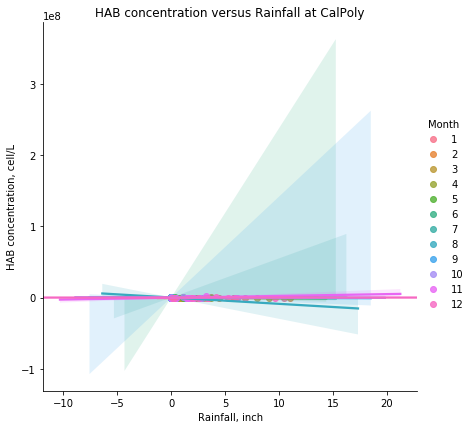

In [211]:
###Linear Regression###
ax = plt.figure()
ax = sns.lmplot(y="HAB_sum",x="Rainfall(inch)",hue = "Month",data = merged_data,size = 6, aspect = 1)
plt.title("HAB concentration versus Rainfall at CalPoly")
plt.xlabel("Rainfall, inch")
plt.ylabel("HAB concentration, cell/L")

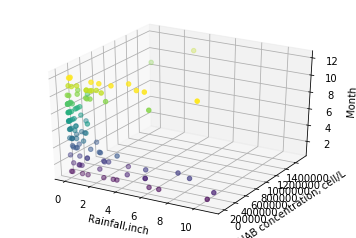

In [212]:
##Try to plot in 3D
temp = merged_data
x = temp["Rainfall(inch)"]
y = temp["HAB_sum"]
z = temp["Month"]
ax = plt.axes(projection='3d')
ax.scatter3D(x,y,z,c=z);
ax.set_xlabel('Rainfall,inch')
ax.set_ylabel('HAB concentration, cell/L')
ax.set_zlabel('Month')
display(ax)